In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image


kaggle_dataset_path = "/kaggle/input/mangoleafdisease/SenMangoFruitDDS_bgremoved"


IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 5

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(kaggle_dataset_path,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,class_mode='categorical',subset='training')

validation_generator = train_datagen.flow_from_directory(kaggle_dataset_path,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')

# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator)
model.save('/kaggle/working/my_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(kaggle_dataset_path,target_size=IMAGE_SIZE,batch_size=1,class_mode='categorical',shuffle=False)

predictions = model.predict(test_generator)

class_labels = list(train_generator.class_indices.keys())

print("Class Labels:", class_labels)

for i in range(len(predictions)):
    predicted_class = class_labels[np.argmax(predictions[i])]
    actual_class = test_generator.filenames[i].split('/')[0]
    image_path = os.path.join(kaggle_dataset_path, test_generator.filenames[i])
accuracy = model.evaluate(test_generator)[1]
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Found 296 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Epoch 1/5
10/10 [==============================] - 8s 705ms/step - loss: 0.8081 - accuracy: 0.5980 - val_loss: 0.4491 - val_accuracy: 0.7568
Epoch 2/5
10/10 [==============================] - 6s 561ms/step - loss: 0.3920 - accuracy: 0.8547 - val_loss: 0.3018 - val_accuracy: 0.8784
Epoch 3/5
10/10 [==============================] - 6s 553ms/step - loss: 0.2582 - accuracy: 0.8919 - val_loss: 0.2289 - val_accuracy: 0.9054
Epoch 4/5
10/10 [==============================] - 6s 554ms/step - loss: 0.1908 - accuracy: 0.9122 - val_loss: 0.3429 - val_accuracy: 0.8514
Epoch 5/5
10/10 [==============================] - 6s 549ms/step - loss: 0.1734 - accuracy: 0.9493 - val_loss: 0.1661 - val_accuracy: 0.9189


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 370 images belonging to 2 classes.
370/370 [==============================] - 4s 10ms/step
Class Labels: ['Alternaria', 'Healthy']
370/370 [==============================] - 4s 11ms/step - loss: 0.1256 - accuracy: 0.9459
Model Accuracy: 94.59%


1/1 [==============================] - 0s 90ms/step


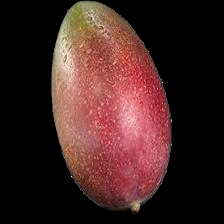

The image is not affected.


In [2]:
model_path = '/kaggle/working/my_model.h5'
model = load_model(model_path)
test_images_path = "/kaggle/input/mangoleafdisease/SenMangoFruitDDS_bgremoved/Healthy"
class_labels = list(train_generator.class_indices.keys())
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array
test_image_path = os.path.join(test_images_path, "healthy_002.jpg")
processed_image = preprocess_image(test_image_path)
predictions = model.predict(processed_image)
predicted_class = class_labels[np.argmax(predictions)]
img = image.load_img(test_image_path)
display(img)
if predicted_class == 'Alternaria' :
    print("The image is affected.")
else:
    print("The image is not affected.")

1/1 [==============================] - 0s 87ms/step


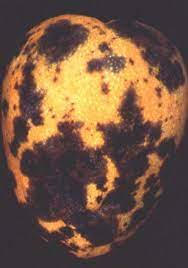

The image is affected.


In [3]:
model_path = '/kaggle/working/my_model.h5'
model = load_model(model_path)
test_images_path = "/kaggle/input/testcnn"
class_labels = list(train_generator.class_indices.keys())
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array
test_image_path = os.path.join(test_images_path, "MANGO1.jpg")
processed_image = preprocess_image(test_image_path)
predictions = model.predict(processed_image)
predicted_class = class_labels[np.argmax(predictions)]
img = image.load_img(test_image_path)
display(img)

if predicted_class == 'Alternaria' :
    print("The image is not affected.")
else:
    print("The image is affected.")